### 4.1 Gamma function plot

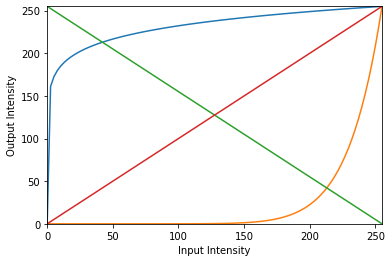

In [1]:
import numpy as np
import matplotlib.pyplot as plt

gamma1 = 0.1
gamma2 = 0.2
gamma3 = 0.5
gamma4 = 1.0
gamma5 = 2.0
gamma6 = 5.0
gamma7 = 10.0

c1 = 255.0 / ( 255.0 ** gamma1 )
c2 = 255.0 / ( 255.0 ** gamma2 )
c3 = 255.0 / ( 255.0 ** gamma3 )
c4 = 255.0 / ( 255.0 ** gamma4 )
c5 = 255.0 / ( 255.0 ** gamma5 )
c6 = 255.0 / ( 255.0 ** gamma6 )
c7 = 255.0 / ( 255.0 ** gamma7 )

x  = np.linspace( 0, 255, 100 )

y1 = x ** gamma1 * c1
y2 = x ** gamma2 * c2
y3 = x ** gamma3 * c3
y4 = x ** gamma4 * c4
y5 = x ** gamma5 * c5
y6 = x ** gamma6 * c6
y7 = x ** gamma7 * c7
y8 = 255 - x
y9 = x

#plt.plot( x, y1, x, y2, x, y3, x, y4, x, y5, x, y6, x, y7 )
plt.plot( x, y1, x, y7, x, y8, x, y9 )
plt.xlabel( "Input Intensity" )
plt.ylabel( "Output Intensity" )
plt.xlim( [0,255] )
plt.ylim( [0,255] )
plt.savefig('gamma.png')
plt.show( )


### <font color="Red">4.2 Gamma Correction </font>
<font color="Red">Please use for loop to calculate Gamma correction of an image. 
<img src="Museum.bmp" width="300px" height="300px">original image 
<img src="Museum_Gamma_0_1.bmp" width="300px" height="300px">Gamma: 0.1
<img src="Museum_Gamma_0_5.bmp" width="300px" height="300px">Gamma: 0.5
<img src="Museum_Gamma_2_0.bmp" width="300px" height="300px">Gamma: 2.0

3


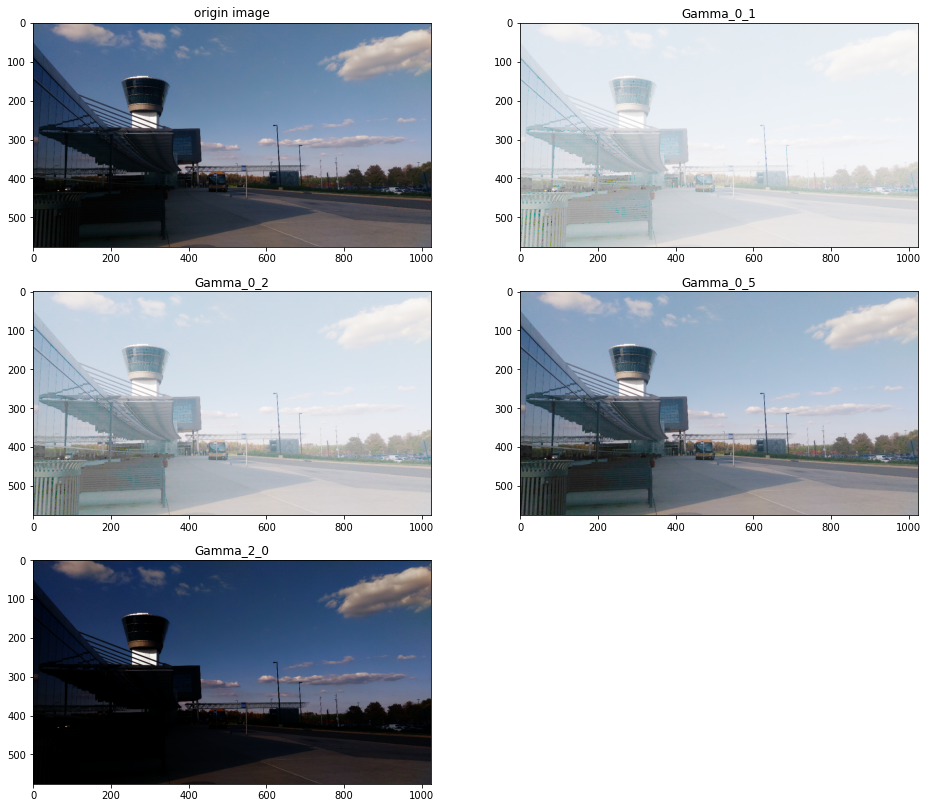

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
        
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                pixel = f[x,y,k] / 255.0 # 先把每個 pixel 點正規化到[0,1]
                g[x,y,k] = np.uint8( pixel ** gamma * 255.0) # 做指數項的調整，然後還原
                
    return g

def main( ):
    imgBGR = cv2.imread( "Museum.bmp", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    print(img.ndim)
    img1 = gamma_correction( img, 0.1 )
    img2 = gamma_correction( img, 0.2 )
    img3 = gamma_correction( img, 0.5 )
    img4 = gamma_correction( img, 2.0 )
    cv2.imwrite( "Museum_Gamma_0_1.bmp", img1[:,:,::-1] )
    cv2.imwrite( "Museum_Gamma_0_2.bmp", img2[:,:,::-1]  )
    cv2.imwrite( "Museum_Gamma_0_5.bmp", img3[:,:,::-1]  )
    cv2.imwrite( "Museum_Gamma_2_0.bmp", img4[:,:,::-1]  )
    plt.figure(figsize=(16, 14))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(3,2,2)     
    plt.title('Gamma_0_1') 
    plt.imshow(img1)
    plt.subplot(3,2,3)     
    plt.title('Gamma_0_2') 
    plt.imshow(img2)
    plt.subplot(3,2,4)     
    plt.title('Gamma_0_5') 
    plt.imshow(img3)
    plt.subplot(3,2,5)     
    plt.title('Gamma_2_0') 
    plt.imshow(img4)
    
main( )

### 4.3 Beta Function

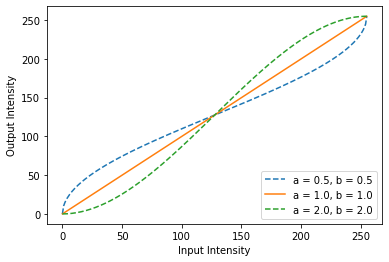

In [3]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

x = np.linspace( 0, 1, 256 )
x1 = x * 255
y1 = special.betainc( 0.5, 0.5, x ) * 255
y2 = x1
y3 = special.betainc( 2.0, 2.0, x ) * 255

plt.plot( x1, y1, '--', label = 'a = 0.5, b = 0.5' )
plt.plot( x1, y2, '-',  label = 'a = 1.0, b = 1.0' )
plt.plot( x1, y3, '--', label = 'a = 2.0, b = 2.0' )
plt.xlabel( 'Input Intensity' )
plt.ylabel( 'Output Intensity' )
plt.legend( loc = 'lower right' )

plt.show( )

### <font color="Red">4.4 Beta Correcrtion</font>
<font color="Red">Please use for loop to calculate Beta correction of an image. 
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html">  special.betainc </a>

(810, 600, 3)


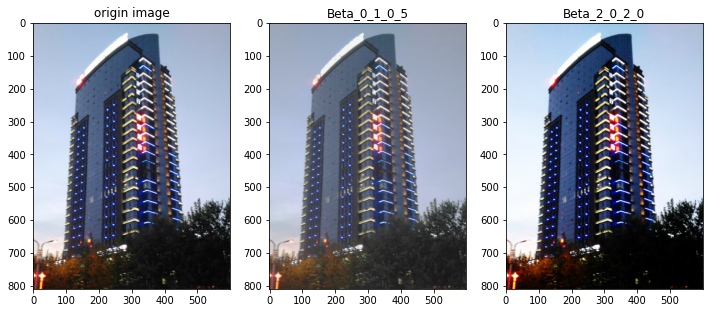

In [4]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def beta_correction( f, a = 2.0, b = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
        
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                pixel = f[x,y,k] / 255.0 # 先把每個 pixel 點正規化到[0,1]
                g[x,y,k] = special.betainc(a, b, pixel) * 255
    return g

def main( ):
    imgBGR = cv2.imread( "Building.bmp", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    img1 = beta_correction( img, a = 0.5, b = 0.5 )
    img2 = beta_correction( img, a = 2.0, b = 2.0 )
    cv2.imwrite( "Building_Beta_0_1_0_5.bmp", img1 )
    cv2.imwrite( "Building_Beta_2_0_2_0.bmp", img2 )
    print(img.shape)    
    plt.figure(figsize=(12, 10))
    plt.subplot(1,3,1)   
    plt.title('origin image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('Beta_0_1_0_5') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('Beta_2_0_2_0') 
    plt.imshow(img2,cmap=plt.cm.gray)

main( )

### 4.5 Histogram <p>
指令：cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)

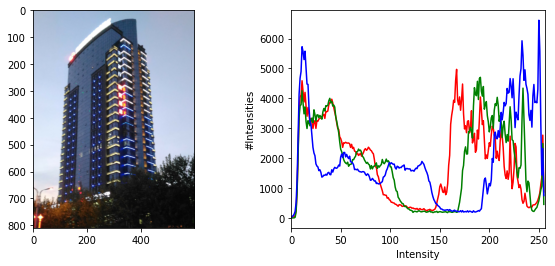

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    if f.ndim != 3:
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
    else:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
#    img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
    imgBGR = cv2.imread( "Building.bmp", -1 )
    img = imgBGR[:,:,::-1]
    histogram( img )

main( )

### <font color="Red">4.6 Image Histogram</font>
<font color="Red">Please use for-loop to calculate Histogram from pixels colors in an image

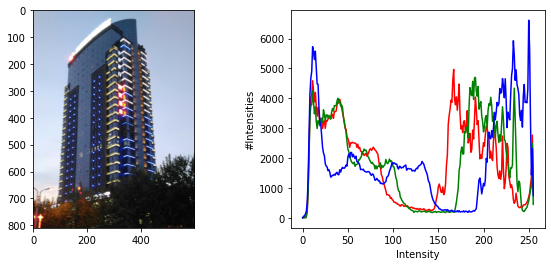

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def myHistogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    
    nr, nc = f.shape[:2]
    
    if f.ndim != 3:
        
        # empty list to store the count 
        # of each intensity value
        count =[]
      
        # empty list to store intensity 
        # value
        r = []
      
        # loop to traverse each intensity 
        # value  
        for k in range(0, 256):
            r.append(k)
            count1 = 0
            for x in range( nr ):
                for y in range( nc ):
                    if f[x, y] == k:
                        count1+= 1
            count.append(count1)
                
        # plotting the histogram
        plt.plot( r, count, color = col)
    else:
        
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            # empty list to store the count 
            # of each intensity value
            count =[]
      
            # empty list to store intensity 
            # value
            r = []
            
            # loop to traverse each intensity 
            # value       
            for k in range(0, 256):
                r.append(k)
                count1 = 0
                for x in range( nr ):
                    for y in range( nc ):
                        if f[x, y, i] == k:
                            count1+= 1
                count.append(count1)
        
            plt.plot( r, count, color = col)
            
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )
                
    

def main( ):
    imgBGR = cv2.imread( "Building.bmp", -1 )
    img = imgBGR[:,:,::-1]
    myHistogram( img )

main( )

### 4.7 Histogram Equalization

[ WARN:0@264.990] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('Indoor_Over_Exposure.bmp'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

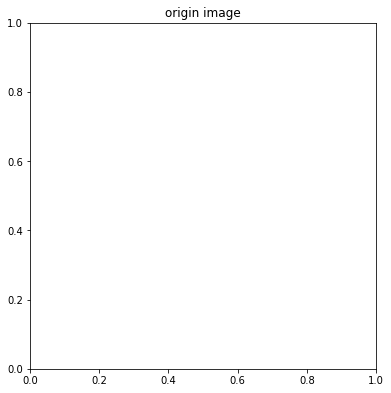

In [7]:
import numpy as np
import cv2

    
img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 ) # 沒有圖
img2 = cv2.equalizeHist( img )
plt.figure(figsize=(16, 14))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(2,2,2)   
plt.title('Histogram Equalization') 
plt.imshow(img2, cmap=plt.cm.gray)


### 4.8 1-D Convolution

In [8]:
import numpy as np

x = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
h = np.array( [ 1, 2, 3, 1, 1 ] )
y = np.convolve( x, h, 'full' )
y1 = np.convolve( x, h, 'same' )
print( "x =", x )
print( "h =", h )
print( "Full Convolution y =", y )
print( "Convolution y =", y1 )

x = [1 2 4 3 2 1 1]
h = [1 2 3 1 1]
Full Convolution y = [ 1  4 11 18 23 20 16 10  6  2  1]
Convolution y = [11 18 23 20 16 10  6]


### 4.9 2-D Convolution

In [9]:
import numpy as np
from scipy.signal import convolve2d

x = np.array( [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ] )
h = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )
y = convolve2d( x, h, 'same' )
print( "x =" )
print( x )
print( "h =" )
print( h )
print( "Convolution y =" )
print( y )

x =
[[1 1 1]
 [1 1 1]
 [1 1 1]]
h =
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Convolution y =
[[12 21 16]
 [27 45 33]
 [24 39 28]]


### 4.10 Average Filtering

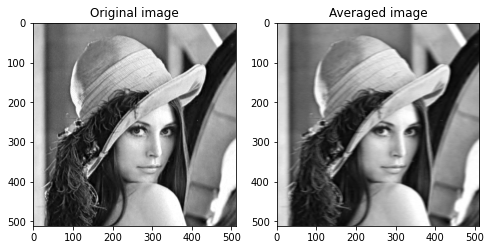

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.blur( img1, ( 7, 1 ) )
#print(img2)
#print(img2.shape[:2])
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Averaged image') 
plt.imshow(img2,cmap=plt.cm.gray)

### <font color="Red"> 4.11 Please write a Average Filter without using opencv function

10 10


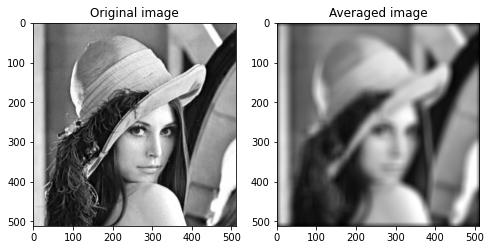

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def average( f , a, b):
    g = f.copy( )
    nr, nc = f.shape[:2]
    
    # zero padding
    # ((n+2p-f)/s) +1 = n, since we want input image size = output size
    # p:padding size, f:filter size, s: stride size
    # p = (f-1*s)/2
    strides = 1
    paddingA = (a-1*strides)//2
    paddingB = (b-1*strides)//2
    print(paddingA, paddingB)
    
    # padding the original img
    padded = np.zeros((nr + 2*paddingA, nc + 2*paddingB), dtype=np.float64) # ndim: 2
    padded[paddingA:paddingA+nr, paddingB:paddingB+nc] = f.copy().astype(np.float64)
    # padded[paddingA:-1*paddingA, paddingB:-1*paddingB] = g
    # print(padded)
    
    # construct the average filter(kernel) mask
    mask = np.ones([a, b], dtype= np.float64)
    mask = mask / (a*b)
    # print(mask)
    
    # outputted image size = int((input image size + 2p - kernel size)/ stride size) + 1
    xOutput = int(((nr - a + 2 * paddingA)/ strides) + 1)
    yOutput = int(((nc - b + 2 * paddingB)/ strides) + 1)
    #print(xOutput, yOutput) # (512, 512) == (nr, nc)
                
    # Convolution, nested for-loop filtering
    for x in range(xOutput): # img size for convolution
        for y in range(yOutput):
            # double nested for-loop
            # do dot product between the padded img and the kernel
            temp = 0
            for i in range(a): # kernel size for dot product
                for j in range(b):
                    temp += padded[x+i][y+j] * mask[i][j]
            g[x][y] = temp
            
    return g

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = average( img1,21,21)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Averaged image') 
plt.imshow(img2,cmap=plt.cm.gray)

### 4.12 Gaussian function <p>
    Opencv 提供的高斯濾波器稱為 GaussianBlur <p>
    會依據濾波器的大小，自動計算標準差

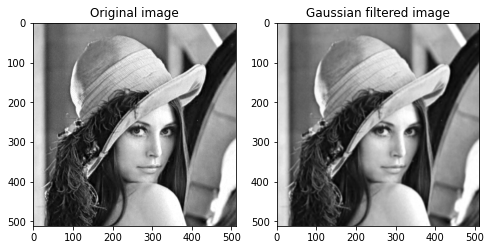

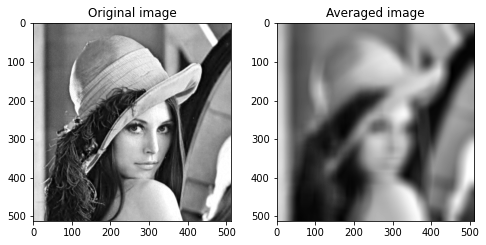

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.GaussianBlur( img1, ( 5, 5 ), 0 )
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Gaussian filtered image') 
plt.imshow(img2,cmap=plt.cm.gray)

img2 = cv2.blur( img1, ( 33,33 ) )
plt.figure(figsize=(8,8))
plt.subplot(2,2,3)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(2,2,4)     
plt.title('Averaged image') 
plt.imshow(img2,cmap=plt.cm.gray)

### 4.13 Image Gradient

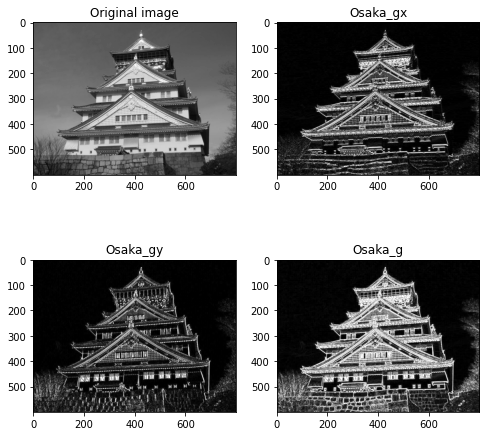

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def Sobel_gradient( f, direction = 1 ):
    sobel_x = np.array( [ [-1,-2,-1], [ 0, 0, 0], [ 1, 2, 1] ] )
    sobel_y = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] )
    if direction == 1:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        gx = abs( grad_x )
        g = np.uint8( np.clip( gx, 0, 255 ) )
    elif direction == 2:
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        gy = abs( grad_y )
        g = np.uint8( np.clip( gy, 0, 255 ) )
    else:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        magnitude = abs( grad_x ) + abs( grad_y )
        g = np.uint8( np.clip( magnitude, 0, 255 ) )
    return g

def main( ):
    img = cv2.imread( "Osaka.bmp", -1 )
    gx  = Sobel_gradient( img, 1 )
    gy  = Sobel_gradient( img, 2 )
    g   = Sobel_gradient( img, 3 )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)     
    plt.title('Original image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(2,2,2)     
    plt.title('Osaka_gx') 
    plt.imshow(gx,cmap=plt.cm.gray)
    plt.subplot(2,2,3)     
    plt.title('Osaka_gy') 
    plt.imshow(gy,cmap=plt.cm.gray)
    plt.subplot(2,2,4)     
    plt.title('Osaka_g') 
    plt.imshow(g,cmap=plt.cm.gray)

main( )

### 4.14 Laplacian

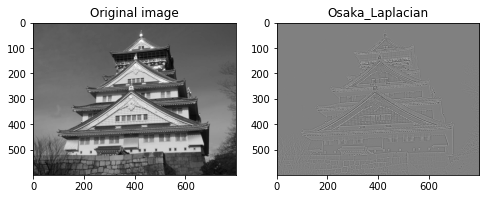

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def laplacian( f ):
    temp = cv2.Laplacian( f, cv2.CV_64F ) + 128
    g = np.uint8( np.clip( temp, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = laplacian( img1 )

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    plt.title('Osaka_Laplacian') 
    plt.imshow(img2,cmap=plt.cm.gray)
    
main( )

### <font color="Red">4.15 Laplacian Sharpening</font>

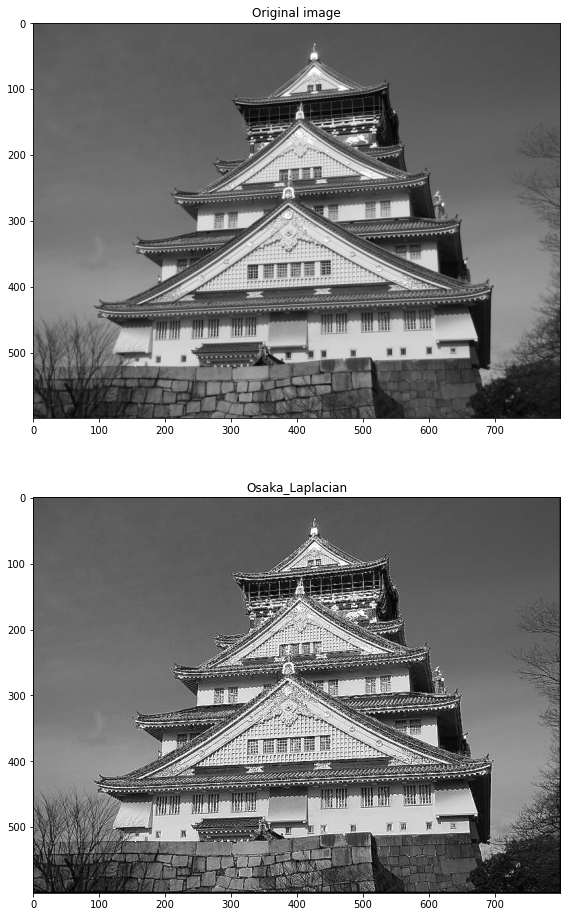

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def LaplacianMy(f):
    g = f.copy( )
    nr, nc = f.shape[:2]
    temp = np.zeros((nr, nc))
    
    Laplacian_operator = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float64)
    
    for x in range( nr-3 ):
        for y in range( nc-3 ):
            temp[x+1, y+1] = abs(np.sum(g[x:x+3, y:y+3] * Laplacian_operator))
    lapla_reply = np.uint8( np.clip( temp, 0, 255 ) )    
    return lapla_reply


def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = LaplacianMy( img1 )

    plt.figure(figsize=(16,16))
    plt.subplot(2,1,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(2,1,2)     
    plt.title('Osaka_Laplacian') 
    plt.imshow(img2,cmap=plt.cm.gray)    
     
main( )

### 4.16 unsharpen

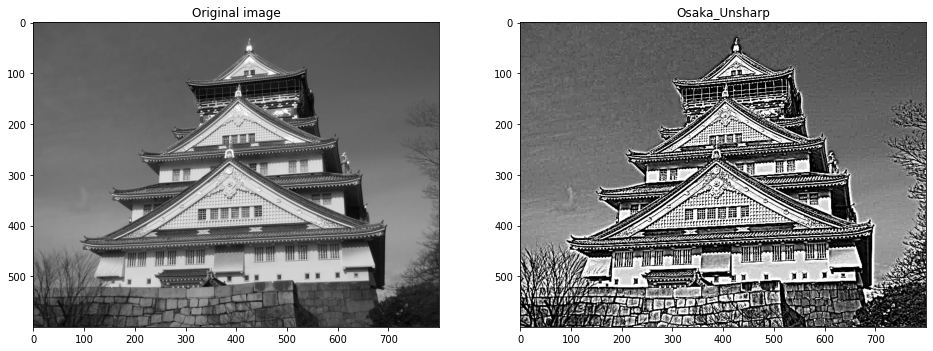

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def unsharp_masking( f, k = 1.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    f_avg = cv2.GaussianBlur( f, ( 15, 15 ), 0 )
    for x in range( nr ):
        for y in range( nc ):
            g_mask = int( f[x,y] ) - int( f_avg[x,y] ) 
            g[x,y] = np.uint8( np.clip( f[x,y] + k * g_mask, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = unsharp_masking( img1, 10.0 )
    cv2.imwrite( "Osaka_Unsharp.bmp", img2 )
    
    plt.figure(figsize=(16,16))
    plt.subplot(2,2,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(2,2,2)     
    plt.title('Osaka_Unsharp') 
    plt.imshow(img2,cmap=plt.cm.gray)    
main( )

## 4-17  salt-and-pepper noise

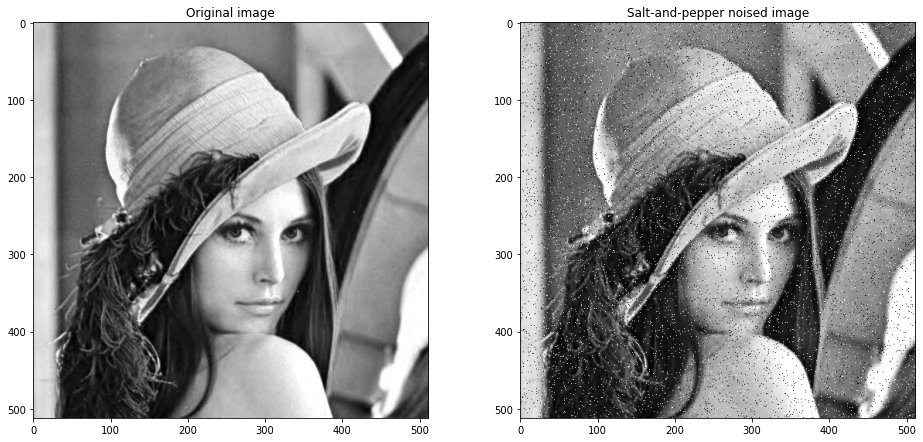

In [17]:
import random
import cv2
import matplotlib.pyplot as plt

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output


img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,0.05)
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(2,2,2)     
plt.title('Salt-and-pepper noised image') 
plt.imshow(img2,cmap=plt.cm.gray) 


### <font color="Red">4-18 Median filter</font>
<font color="Red">Please design a Python program by using for-loop on block processing to calculate median fiter results of 4-16<p>
<img src="4-17.png" width="800px" height="500px">

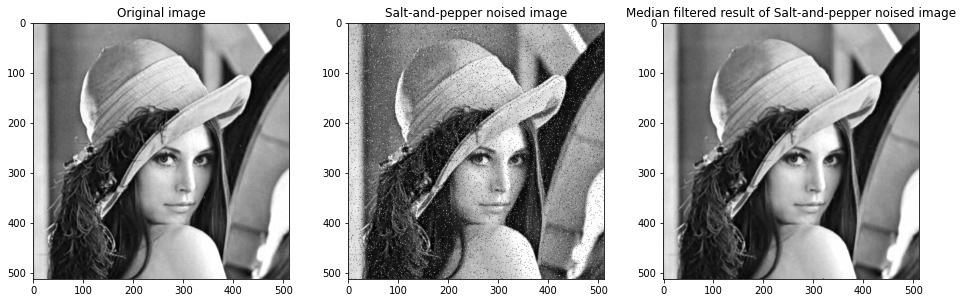

In [18]:
import cv2
import numpy as np
 
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

def median_filter(image, kernel_size = 3):
    nr, nc = image.shape[:2]  
    median_image = image.copy()
    
    strides = 1
    # zero padding
    padding = (kernel_size-1*strides)//2
    
    # padding the original img
    padded = np.zeros((nr + 2*padding, nc + 2*padding), dtype=np.float64) # ndim: 2
    padded[padding:padding+nr, padding:padding+nc] = image.copy().astype(np.float64)
        
    # Convolution, nested for-loop filtering
    for x in range(nr): # img size for convolution
        for y in range(nc):
            median_image[x, y] = np.median(padded[x:x+kernel_size, y:y+kernel_size])

    median_image = np.uint8( np.clip( median_image, 0, 255 ) ) 
    return median_image  
    
img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,0.05)
img3 = median_filter(img2)

img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,0.05)
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)     
plt.title('Original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(3,3,2)     
plt.title('Salt-and-pepper noised image') 
plt.imshow(img2,cmap=plt.cm.gray) 
plt.subplot(3,3,3)     
plt.title('Median filtered result of Salt-and-pepper noised image') 
plt.imshow(img3,cmap=plt.cm.gray) 